In [77]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [168]:
import os 
import numpy as np
import pandas as pd
from enigmatoolbox.utils.parcellation import parcel_to_surface
from enigmatoolbox.plotting import plot_subcortical
from enigmatoolbox.plotting import plot_cortical
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.stats.multitest
from scipy import stats
import scipy.stats

In [169]:
data_dir = '/Users/ltran/Documents/Data/Outputs/'

In [170]:
def brain_maps(X):
    CT_d_fsa5 = parcel_to_surface(X, 'aparc_fsa5')
    plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
                  cmap='RdBu_r', color_bar=True, color_range=(-abs(X).max(), abs(X).max()))

## Load Z-Scores

In [4]:
Z_tca = pd.read_csv(os.path.join(data_dir, 'Z_tca.csv'))

In [154]:
Z_asd = pd.read_csv(os.path.join(data_dir, 'Z_asd_rdb.csv'))

In [82]:
Z_aims = pd.read_csv(os.path.join(data_dir, 'Z_asd_aims.csv'))

In [83]:
Z_abide = pd.read_csv(os.path.join(data_dir, 'Z_asd_abide.csv'))

## Load Coeff

In [160]:
coef_tca = pd.read_csv(os.path.join(data_dir, 'coef_tca_vol.csv'))

In [174]:
coef_rdb =  pd.read_csv(os.path.join(data_dir, 'coef_asd_vol.csv'))

In [92]:
coef_rdb = pd.read_csv(os.path.join(data_dir, 'coef_asd_rdb.csv'))
coef_aims = pd.read_csv(os.path.join(data_dir, 'coef_asd_aims.csv'))
coef_abide = pd.read_csv(os.path.join(data_dir, 'coef_asd_abide.csv'))

In [120]:
coef_rdb_tca = pd.read_csv(os.path.join(data_dir, 'coef_tca.csv'))

In [180]:
coef_rdb.coef.min()

-0.0985377317900374

In [181]:
plot_subcortical(array_name=coef_rdb.coef, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, color_range=(-0.3, 0.3))

In [175]:
X = coef_rdb.coef

CT_d_fsa5 = parcel_to_surface(X, 'aparc_fsa5')
plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, color_range=(-0.5, 0.5))

KeyError: '[24, 29, 28, 27, 31, 25, 30, 22, 18, 35, 21, 33, 23, 17, 26, 19, 20, 34, 32, 16, 59, 64, 57, 62, 63, 60, 46, 36, 70, 47, 44, 38, 52, 58, 66, 53, 55, 61, 56, 43, 65, 51, 42, 50, 54, 39, 48, 49, 45, 40, 69, 68, 37, 67, 41] not in index'

In [77]:
brain_maps(coef_abide.coef)

In [29]:
X = pd.read_csv(os.path.join(data_dir, 'coef_tca_vol.csv'))

In [13]:
sns.set_theme(style = 'darkgrid')
sns.barplot(x = X.coef, y = X.ROI, hue = X.sign, palette=['r','b'])
plt.title('TCA')
plt.xlim(-1, 1 )
plt.show()

NameError: name 'X' is not defined

## Define ROI

In [155]:
thick = [col for col in Z_asd.columns if 'Z_predict' in col]
# thick.remove('lh_MeanThickness_thickness_Z_predict')
# thick.remove('rh_MeanThickness_thickness_Z_predict')
len(thick)

68

## Define diag groups

In [240]:
# Gather weight restored and acute into TCA (optional)
Z_tca.loc[((Z_tca.ASD == 'TCA_pr' ) |
    (Z_tca.ASD == 'TCA_ac' )), 'ASD'] = 'TCA'

In [226]:
Z_tca.loc[(Z_tca.ASD == 'Relative' ), 'ASD'] = 'No'

In [157]:
Z_asd.loc[(Z_asd.ASD == 'Relative' ), 'ASD'] = 'No'

In [609]:
# Sampling ASD to match TCA dataframe
Zasd = pd.concat([Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 2)], 
           Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 1)].sample(n=43)])

## Plot Z-Scores 

In [86]:
Z_asd['BD'] = 'RDB'
Z_aims['BD'] = 'EU_AIMS'

In [87]:
Z_abide['BD'] = 'ABIDe'

In [145]:
d = pd.concat([Z_asd, Z_aims, Z_abide])

In [158]:
Z_asd.groupby('ASD').size()

ASD
No      35
Yes    273
dtype: int64

In [31]:
Z_abide.groupby('ASD').size()

ASD
No     171
Yes    329
dtype: int64

In [71]:
CT_d_fsa5 = parcel_to_surface(Z_asd[thick].mean(), 'aparc_fsa5')
plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, color_range=(-0.8, 0.8))

In [612]:
d = d[(d.ASD == 'TCA_ac') | (d.ASD == 'Yes')| (d.ASD == 'No')| (d.ASD == 'TCA_pr')]

In [146]:
d = d[d.ASD == 'No']

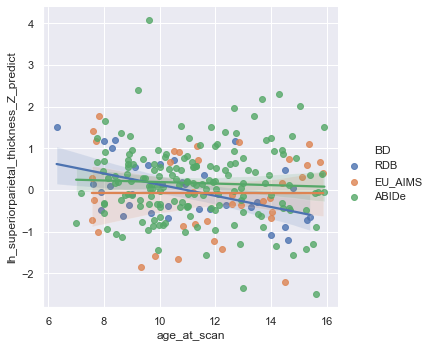

In [151]:
sns.lmplot(data = d, y = 'lh_superiorparietal_thickness_Z_predict', x = 'age_at_scan', hue = 'BD')

lh_bankssts_thickness_Z_predict


lh_caudalanteriorcingulate_thickness_Z_predict


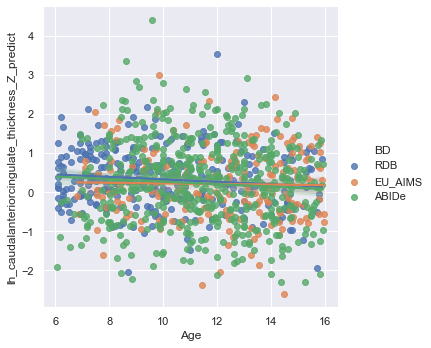

lh_caudalmiddlefrontal_thickness_Z_predict


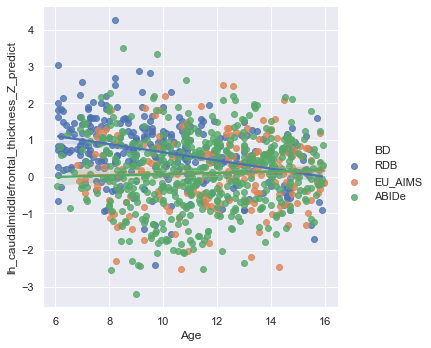

lh_cuneus_thickness_Z_predict


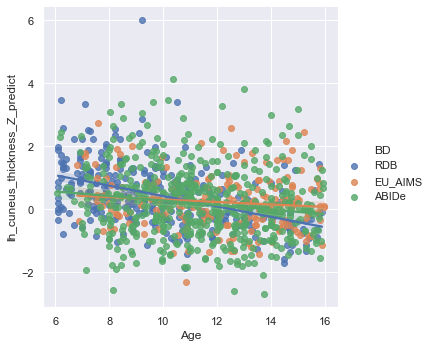

lh_entorhinal_thickness_Z_predict


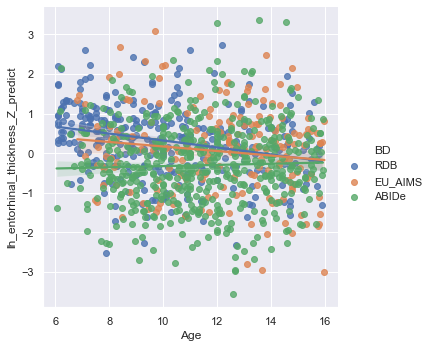

lh_fusiform_thickness_Z_predict


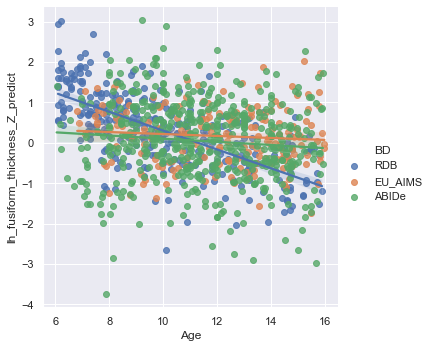

lh_inferiorparietal_thickness_Z_predict


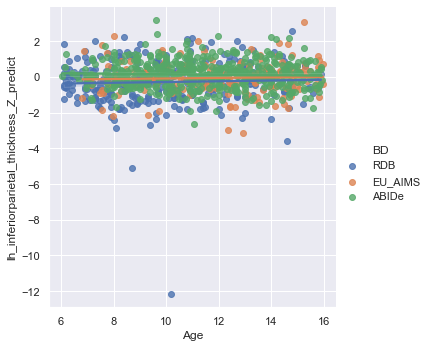

lh_inferiortemporal_thickness_Z_predict


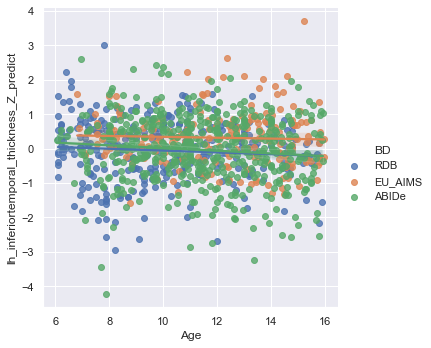

lh_isthmuscingulate_thickness_Z_predict


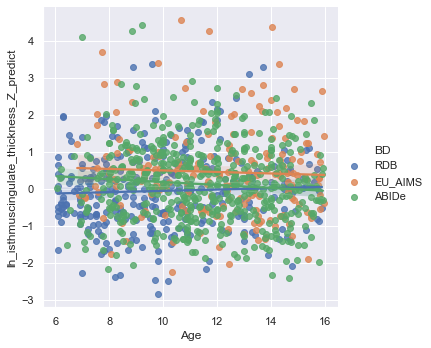

lh_lateraloccipital_thickness_Z_predict


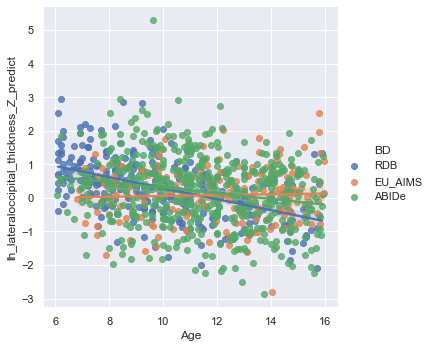

lh_lateralorbitofrontal_thickness_Z_predict


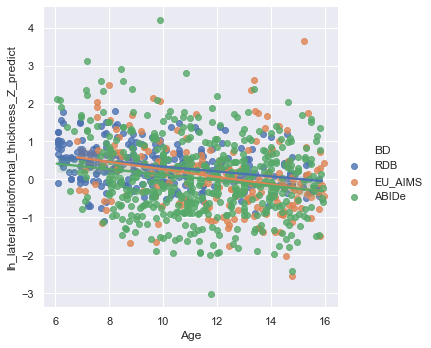

lh_lingual_thickness_Z_predict


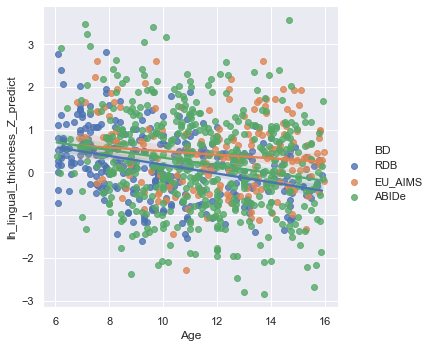

lh_medialorbitofrontal_thickness_Z_predict


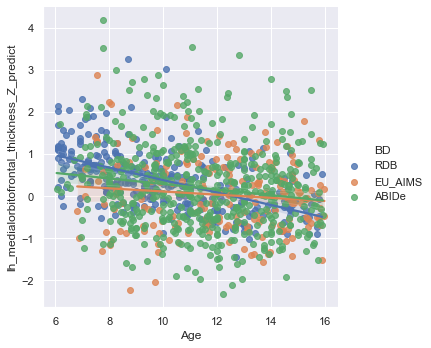

lh_middletemporal_thickness_Z_predict


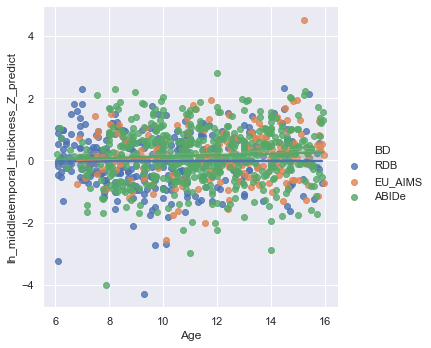

lh_parahippocampal_thickness_Z_predict


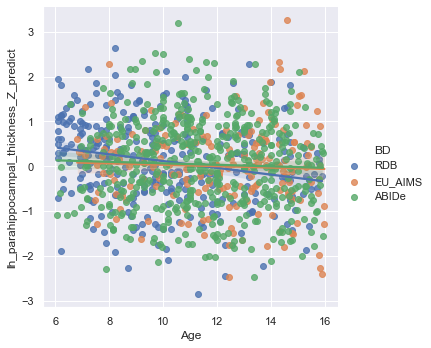

lh_paracentral_thickness_Z_predict


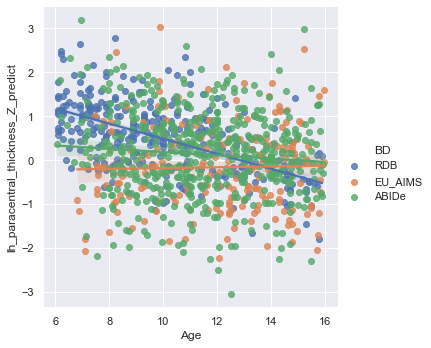

lh_parsopercularis_thickness_Z_predict


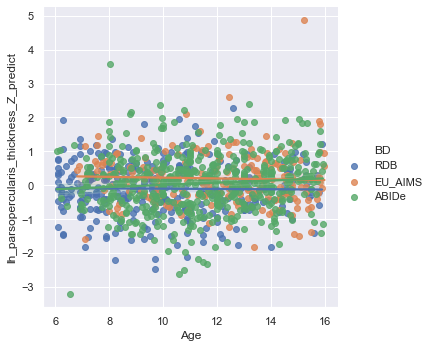

lh_parsorbitalis_thickness_Z_predict


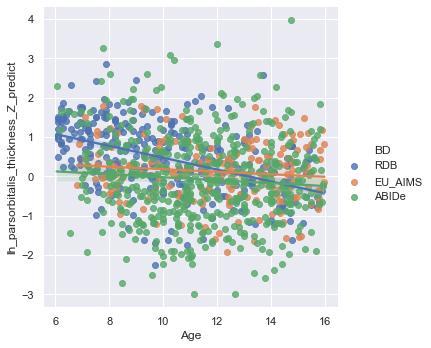

lh_parstriangularis_thickness_Z_predict


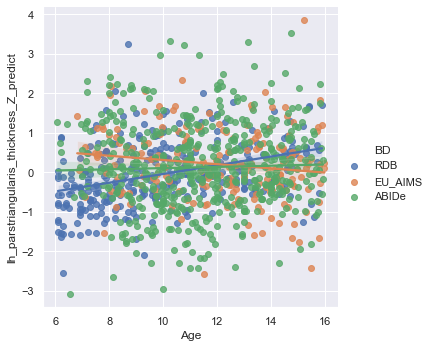

lh_pericalcarine_thickness_Z_predict


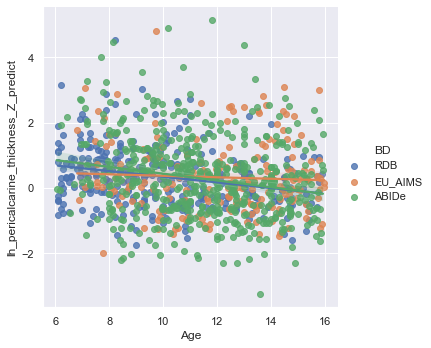

lh_postcentral_thickness_Z_predict


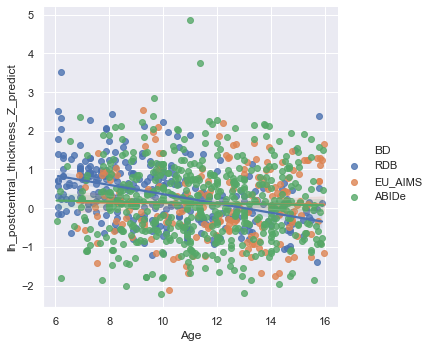

lh_posteriorcingulate_thickness_Z_predict


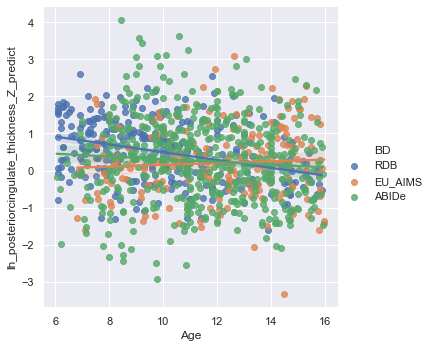

lh_precentral_thickness_Z_predict


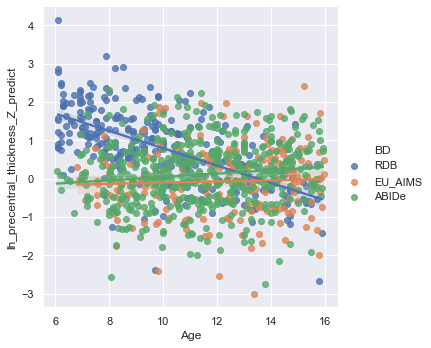

lh_precuneus_thickness_Z_predict


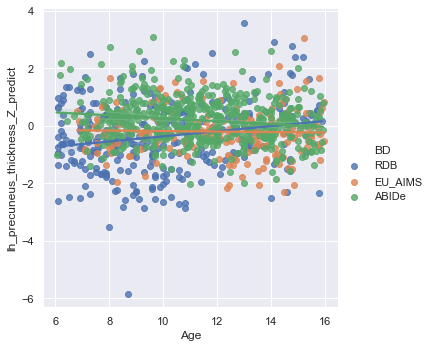

lh_rostralanteriorcingulate_thickness_Z_predict


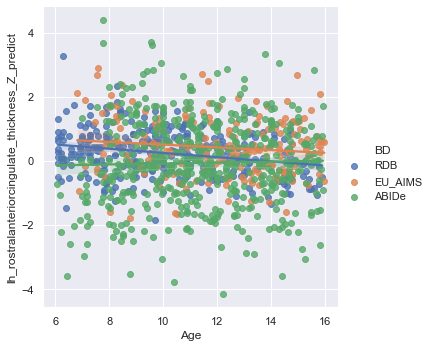

lh_rostralmiddlefrontal_thickness_Z_predict


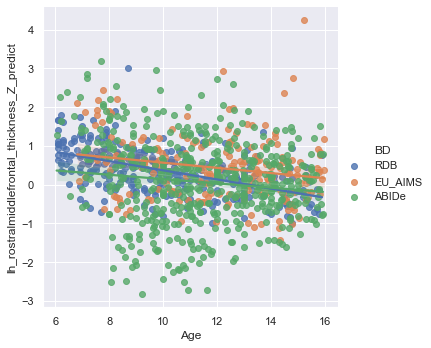

lh_superiorfrontal_thickness_Z_predict


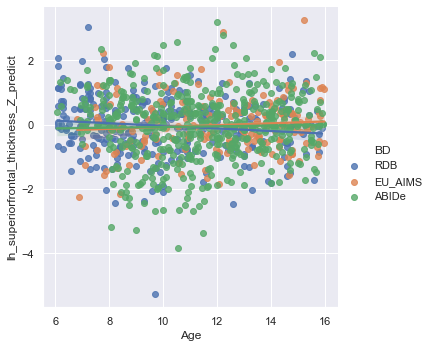

lh_superiorparietal_thickness_Z_predict


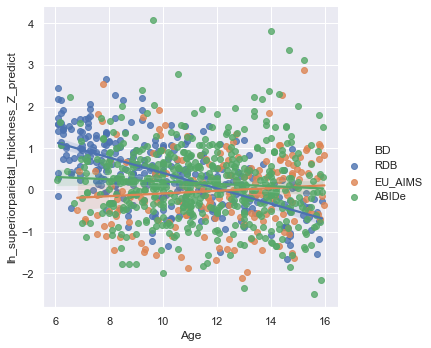

lh_superiortemporal_thickness_Z_predict


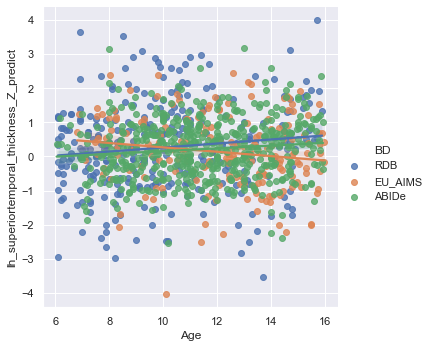

lh_supramarginal_thickness_Z_predict


lh_frontalpole_thickness_Z_predict


lh_temporalpole_thickness_Z_predict


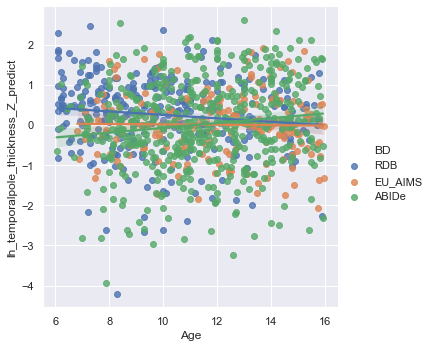

lh_transversetemporal_thickness_Z_predict


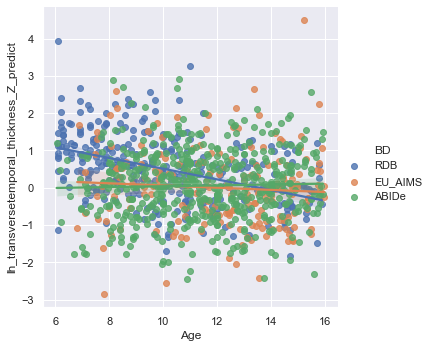

lh_insula_thickness_Z_predict


rh_bankssts_thickness_Z_predict


rh_caudalanteriorcingulate_thickness_Z_predict


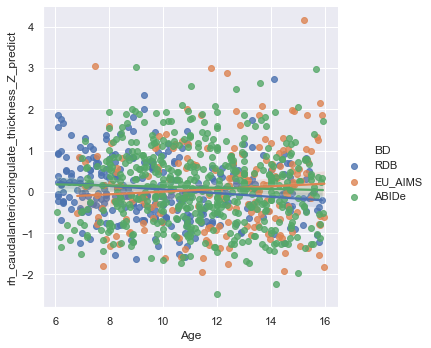

rh_caudalmiddlefrontal_thickness_Z_predict


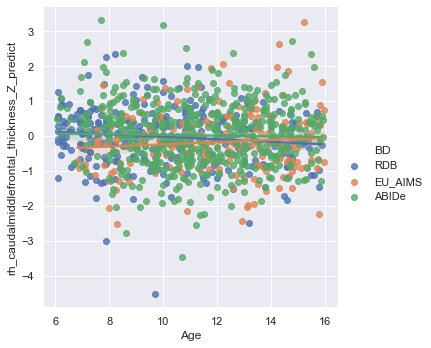

rh_cuneus_thickness_Z_predict


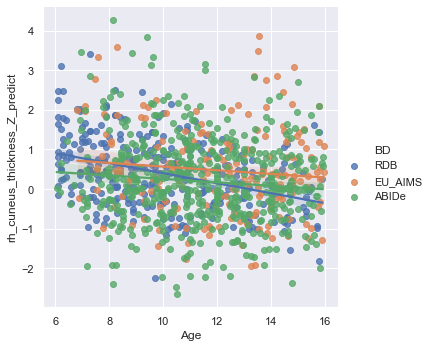

rh_entorhinal_thickness_Z_predict


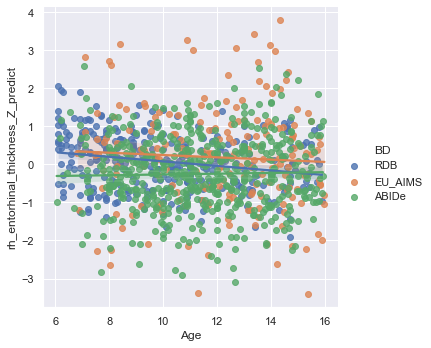

rh_fusiform_thickness_Z_predict


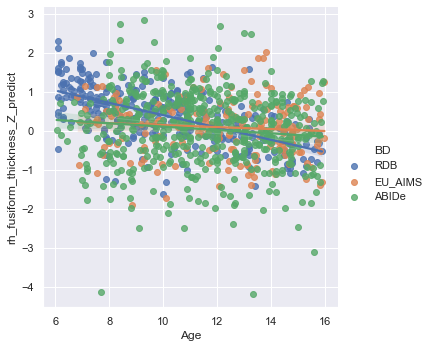

rh_inferiorparietal_thickness_Z_predict


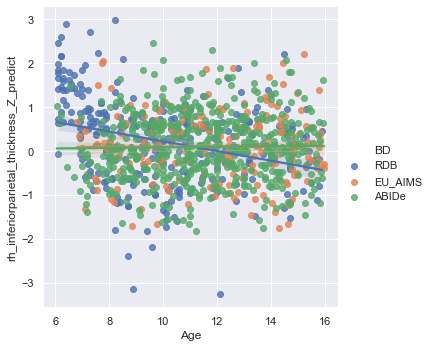

rh_inferiortemporal_thickness_Z_predict


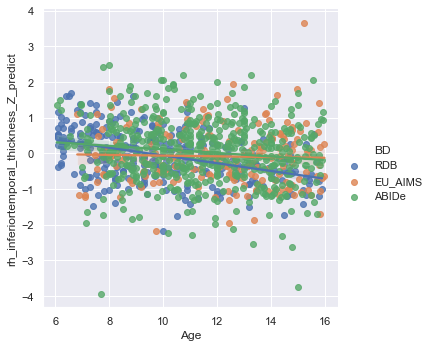

rh_isthmuscingulate_thickness_Z_predict


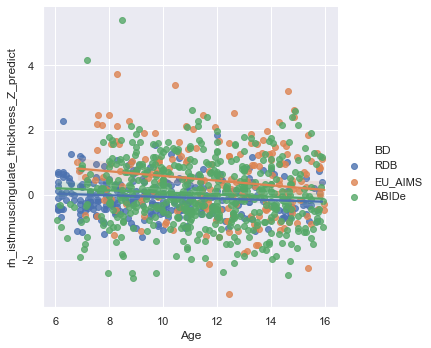

rh_lateraloccipital_thickness_Z_predict


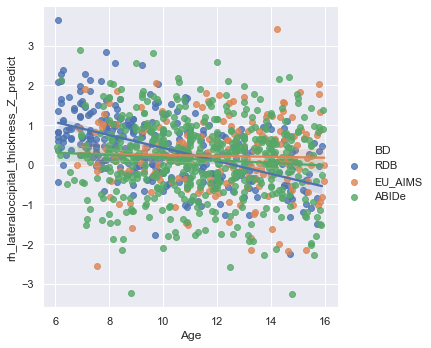

rh_lateralorbitofrontal_thickness_Z_predict


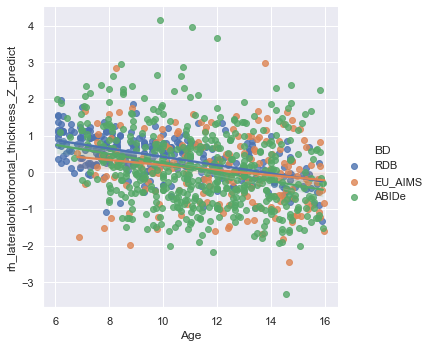

rh_lingual_thickness_Z_predict


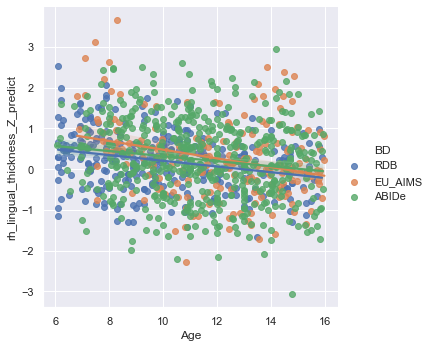

rh_medialorbitofrontal_thickness_Z_predict


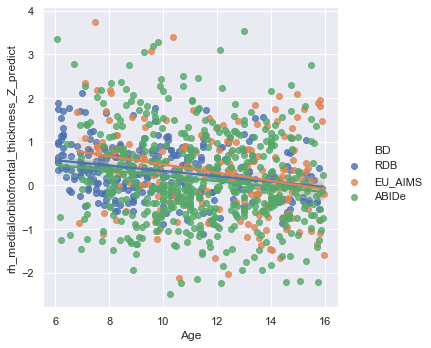

rh_middletemporal_thickness_Z_predict


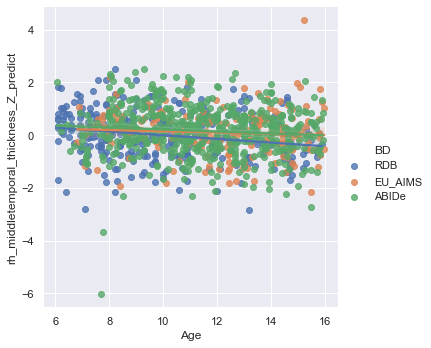

rh_parahippocampal_thickness_Z_predict


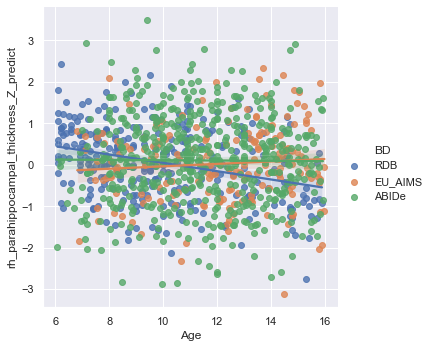

rh_paracentral_thickness_Z_predict


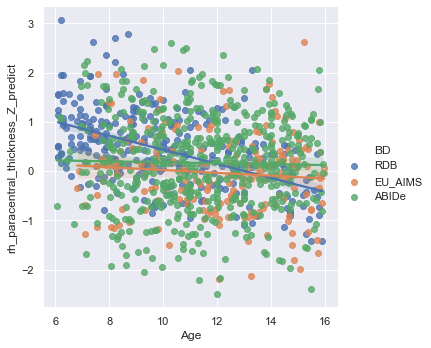

rh_parsopercularis_thickness_Z_predict


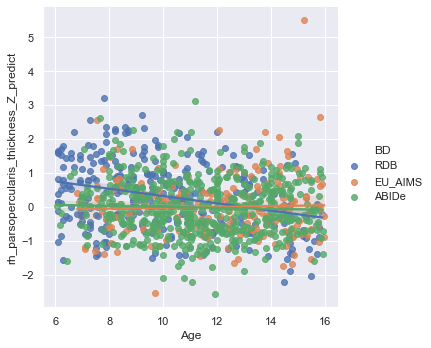

rh_parsorbitalis_thickness_Z_predict


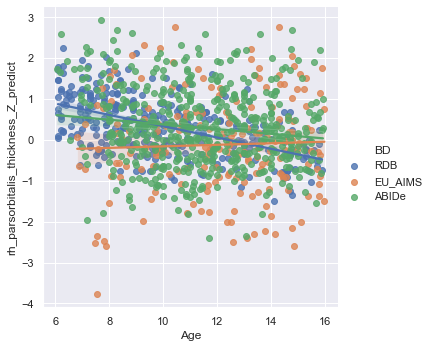

rh_parstriangularis_thickness_Z_predict


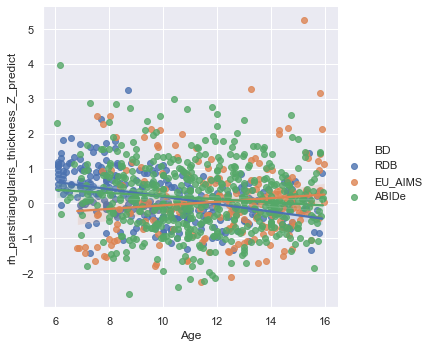

rh_pericalcarine_thickness_Z_predict


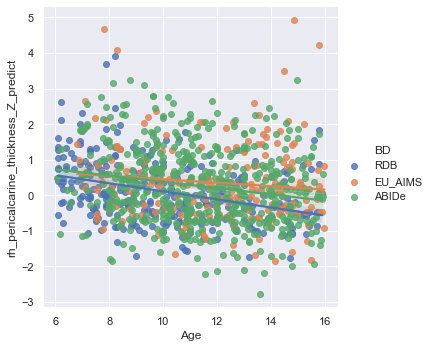

rh_postcentral_thickness_Z_predict


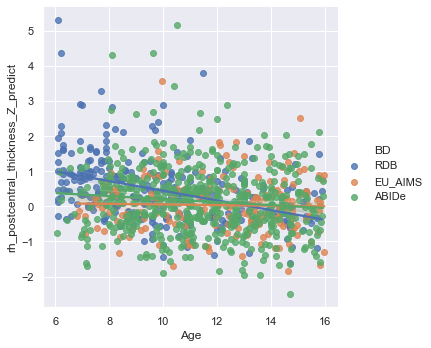

rh_posteriorcingulate_thickness_Z_predict


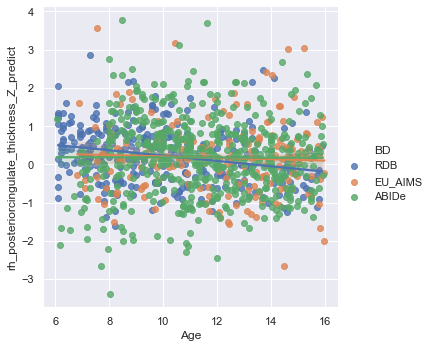

rh_precentral_thickness_Z_predict


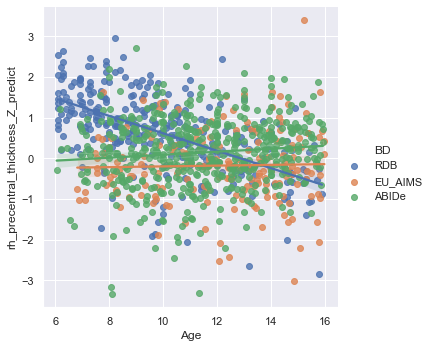

rh_precuneus_thickness_Z_predict


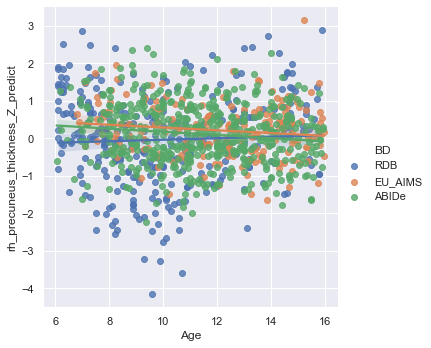

rh_rostralanteriorcingulate_thickness_Z_predict


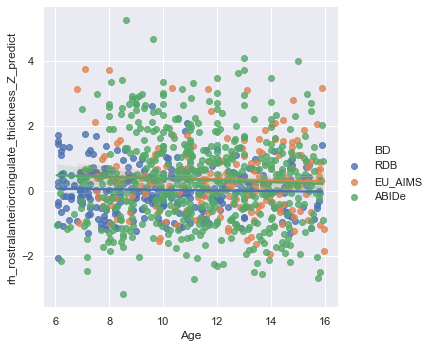

rh_rostralmiddlefrontal_thickness_Z_predict


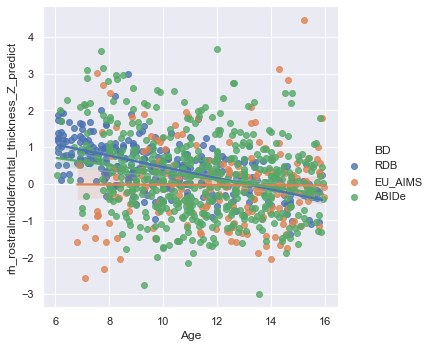

rh_superiorfrontal_thickness_Z_predict


KeyboardInterrupt: 

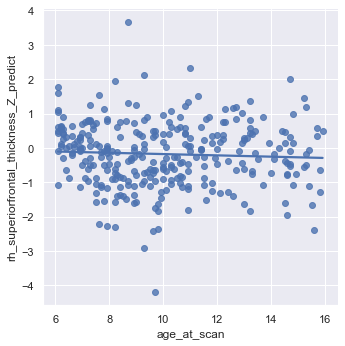

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="darkgrid")

for i in thick:
    print(i)
    sns.lmplot(data = d.rename(columns = {'ASD':'Status'}), y = i, x = 'age_at_scan', hue = 'BD')
#     label_point(df_d['ASD'], df_d['TCA'], coef_tca['ROI'], plt.gca())
    plt.xlabel('Age')
    plt.show()

## Corrélation entre Z-Scores bruts ASD vs TCA

In [ ]:
plot_subcortical(, size=(800, 400),
                cmap='RdBu_r', color_bar=True, color_range=(-0.5, 0.5))

In [260]:
Z_tca.age_at_scan.describe()

count    133.000000
mean      11.476692
std        2.041868
min        6.200000
25%       10.100000
50%       11.600000
75%       12.800000
max       15.900000
Name: age_at_scan, dtype: float64

In [268]:
Z_asd.groupby('Sex').size()

Sex
Female     49
Male      237
dtype: int64

In [ ]:
Z_tca

In [269]:
Z_tca.groupby('Sex').size()

Sex
Female    81
Male      11
dtype: int64

In [287]:
from sklearn.utils import shuffle

In [281]:

mega_cor = []
for j in range(100):
#     Zasd = pd.concat([Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 2)], 
#                Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 1)].sample(n=43)])
    Zasd = Z_asd[(Z_asd.ASD == 'Yes')
                 & (Z_asd.sex == 2)
                ]
#     Zasd = Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 2)].sample()
    Ztca = Z_tca[(Z_tca.ASD == 'TCA') 
                 & (Z_tca.sex == 2)
                ].sample(n = 49)
    corr = []
    pvall = []
    for i in thick:
        corr.append(stats.pearsonr(Zasd[i], Ztca[i])[0])
        pvall.append(stats.pearsonr(Zasd[i], Ztca[i])[1])

    cor_df = pd.DataFrame.from_dict({'Correlation' : corr, 'Pval' : pvall})
    cor_df['ROI'] = thick
    cor_df = cor_df
    cor_df['adj_p'] = statsmodels.stats.multitest.multipletests(pvall, alpha = 0.05, method = 'bonferroni')[0]
#     sns.set(rc={'figure.figsize':(25,20)}, font_scale = 2)
#     sns.set_palette('Reds')
#     sns.barplot(x = cor_df['Correlation'], y = cor_df.ROI.str.replace('_thickness_Z_predict', ''), hue = cor_df.adj_p)

    mega_cor.append(cor_df)
#     plt.show()

In [254]:
from scipy import stats
mega_cor = []
for j in range(100):
    Zasd = pd.concat([Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 2)], 
               Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 1)].sample(n=43)])
#     Zasd = Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 2)].sample()
    corr = []
    pvall = []
    for i in thick:
        corr.append(stats.pearsonr(Zasd[i], Z_tca.loc[Z_tca.ASD == 'TCA', i])[0])
        pvall.append(stats.pearsonr(Zasd[i], Z_tca.loc[Z_tca.ASD == 'TCA', i])[1])

    cor_df = pd.DataFrame.from_dict({'Correlation' : corr, 'Pval' : pvall})
    cor_df['ROI'] = thick
    cor_df = cor_df
    cor_df['adj_p'] = statsmodels.stats.multitest.multipletests(pvall, alpha = 0.05, method = 'bonferroni')[0]
#     sns.set(rc={'figure.figsize':(25,20)}, font_scale = 2)
#     sns.set_palette('Reds')
#     sns.barplot(x = cor_df['Correlation'], y = cor_df.ROI.str.replace('_thickness_Z_predict', ''), hue = cor_df.adj_p)

    mega_cor.append(cor_df)
#     plt.show()

In [252]:
mega_cor = []
for j in range(100):
#     Zasd = pd.concat([Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 2)], 
#                Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 1)].sample(n=43)])
    Zasd = Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 2)]
    corr = []
    pvall = []
    for i in thick:
        corr.append(stats.pearsonr(Zasd[i], Z_tca.loc[(Z_tca.ASD == 'TCA')
                                                      & (Z_tca.sex == 2), i].sample(n = 49))[0])
        pvall.append(stats.pearsonr(Zasd[i], Z_tca.loc[(Z_tca.ASD == 'TCA')
                                                       & (Z_tca.sex == 2), i].sample(n = 49))[1])

    cor_df = pd.DataFrame.from_dict({'Correlation' : corr, 'Pval' : pvall})
    cor_df['ROI'] = thick
    cor_df = cor_df
    cor_df['adj_p'] = statsmodels.stats.multitest.multipletests(pvall, alpha = 0.05, method = 'bonferroni')[0]
#     sns.set(rc={'figure.figsize':(25,20)}, font_scale = 2)
#     sns.set_palette('Reds')
#     sns.barplot(x = cor_df['Correlation'], y = cor_df.ROI.str.replace('_thickness_Z_predict', ''), hue = cor_df.adj_p)

    mega_cor.append(cor_df)

In [282]:
CT_d_fsa5 = parcel_to_surface(pd.concat(mega_cor, axis =1).Correlation.mean(axis =1), 'aparc_fsa5')
plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, color_range=(-0.37, 0.37))

In [234]:
pd.concat(mega_cor, axis = 1).Correlation

Correlation  Correlation  Correlation  Correlation  Correlation  \
0      0.029571     0.294461     0.063513    -0.123593    -0.105286   
1     -0.010759     0.033560    -0.053626    -0.005877    -0.137186   
2      0.059652    -0.127936     0.076259    -0.001647    -0.029641   
3      0.241992     0.057843     0.396970    -0.147825    -0.157096   
4     -0.102547     0.047453     0.097484    -0.052585     0.323060   
..          ...          ...          ...          ...          ...   
63     0.242709     0.173842     0.172606    -0.114937    -0.193766   
64     0.152979    -0.201242     0.119092    -0.188250     0.271013   
65    -0.402165    -0.046440     0.057545     0.017994     0.009704   
66     0.047797    -0.081865     0.400924     0.124892    -0.044637   
67     0.092689    -0.248696    -0.232803     0.182064    -0.121475   

    Correlation  Correlation  Correlation  Correlation  Correlation  ...  \
0      0.083274     0.019055     0.107114     0.028711     0.176425  ...   
1     -0.225088     0.220771    -0.087648    -0.033628     0.000205  ...   
2     -0.105851    -0.164001     0.112871    -0.170857     0.084491  ...   
3     -0.037702     0.061891     0.062109     0.019875     0.102938  ...   
4      0.145203     0.053728     0.101571    -0.033511     0.056651  ...   
..          ...          ...          ...          ...          ...  ...   
63    -0.171080    -0.161968    -0.025876    -0.143088     0.011231  ...   
64    -0.147697    -0.055652    -0.198234     0.184529     0.115748  ...   
65     0.257731    -0.042980     0.179999    -0.020841    -0.156515  ...   
66     0.309592     0.169710     0.054417    -0.184060    -0.077705  ...   
67     0.150476     0.256704    -0.090657     0.326488    -0.122374  ...   

    Correlation  Correlation  Correlation  Correlation  Correlation  \
0     -0.124127    -0.217800    -0.036534    -0.348042    -0.033219   
1      0.114717     0.165869    -0.199123    -0.359473     0.010173   
2     -0.065942    -0.220168     0.107185     0.110321     0.107331   
3     -0.010565     0.321047     0.050192     0.034477    -0.048667   
4      0.116266    -0.101606    -0.155746     0.043593    -0.198301   
..          ...          ...          ...          ...          ...   
63     0.136406    -0.036471     0.012031     0.015386     0.038046   
64    -0.004641    -0.040117     0.440625    -0.301178    -0.076774   
65    -0.047815     0.025601    -0.231368    -0.237845    -0.122510   
66     0.094745    -0.101630    -0.266523    -0.226358    -0.097610   
67     0.093774     0.028590    -0.140344    -0.054168    -0.000304   

    Correlation  Correlation  Correlation  Correlation  Correlation  
0     -0.055033    -0.004481    -0.266137     0.124199     0.086179  
1      0.018710     0.049777     0.156118    -0.198302     0.194707  
2     -0.213764    -0.073647    -0.003234     0.169925    -0.177134  
3     -0.091845     0.145074    -0.181226     0.054004     0.009563  
4      0.066461    -0.320917     0.125610    -0.315686    -0.020712  
..          ...          ...          ...          ...          ...  
63     0.055317    -0.140490    -0.259583     0.155533    -0.144757  
64    -0.114994    -0.136697     0.014736    -0.470969    -0.014849  
65     0.093795    -0.185425     0.098320     0.007816     0.141284  
66    -0.055161    -0.001084    -0.121096     0.231620    -0.028757  
67    -0.062337     0.020971    -0.233545    -0.018839    -0.099563  

[68 rows x 100 columns]

In [231]:
mega_cor = pd.concat(mega_cor, axis = 1)

In [39]:
cor_prev = []
for j in range(100):
    Zasd = pd.concat([Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 2)], 
           Z_asd[(Z_asd.ASD == 'Yes') & (Z_asd.sex == 1)].sample(n=43)])
    prev_asd = compute_abs_prevalence(Zasd[thick])
    prev_td = compute_abs_prevalence(Z_asd.loc[Z_asd.ASD == 'No', thick])
    cor_prev.append(prev_asd-prev_td)

In [41]:
CT_d_fsa5 = parcel_to_surface(pd.concat(cor_prev).mean(), 'aparc_fsa5')
plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
                  cmap='RdBu_r', color_bar=True, color_range=(-0.1, 0.1))

In [38]:
brain_maps(pd.concat(cor_prev).mean())

## Compute prevalences

In [126]:
def compute_abs_prevalence(Z_df_est):
    prev_est= {}
    for i in Z_df_est.columns:
        prev_est.update({i : [Z_df_est.query(f'{i} > 2 or {i} < -2').count()[1]/Z_df_est.shape[0]]})
    prev_est = pd.DataFrame.from_dict(prev_est)
    
    return prev_est

In [127]:

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

In [94]:
# def compute_abs_prevalence(Z_df_est):
#     prev_est= {}
#     for i in Z_df_est.columns:
#         prev_est.update({i : [Z_df_est.query(f'{i} >2').count()[1]/Z_df_est.shape[0]]})
#     prev_est = pd.DataFrame.from_dict(prev_est)
    
#     return prev_est

In [45]:
prev_tca = compute_abs_prevalence(Z_tca.loc[Z_tca.ASD == 'TCA', thick])
prev_td = compute_abs_prevalence(Z_tca.loc[Z_tca.ASD == 'No', thick])

In [128]:
prev_asd = compute_abs_prevalence(Z_asd.loc[Z_asd.ASD == 'Yes', thick])
prev_td = compute_abs_prevalence(Z_asd.loc[Z_asd.ASD == 'No', thick])

In [130]:
prev_asd = compute_abs_prevalence(Z_aims.loc[Z_aims.ASD == 'Yes', thick])
prev_td = compute_abs_prevalence(Z_aims.loc[Z_aims.ASD == 'No', thick])

In [124]:
prev_asd = compute_abs_prevalence(Z_abide.loc[Z_abide.ASD == 'Yes', thick])
prev_td = compute_abs_prevalence(Z_abide.loc[Z_abide.ASD == 'No', thick])

In [47]:
prev_asd = compute_abs_prevalence(Zasd[thick])
prev_td = compute_abs_prevalence(Z_asd.loc[Z_asd.ASD == 'No', thick])

NameError: name 'Zasd' is not defined

In [57]:
Z_asd.loc[Z_asd.ASD == 'Relative', 'ASD' ] = 'No'

## Plot onto brain maps

In [218]:
CT_d_fsa5 = parcel_to_surface(np.array(prev_tca-prev_td), 'aparc_fsa5')
plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, color_range=(-0.35, 0.35))

In [105]:
brain_maps(np.array(prev_asd-prev_td))

In [131]:
CT_d_fsa5 = parcel_to_surface(np.array(prev_asd-prev_td), 'aparc_fsa5')
plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, color_range=(-0.10, 0.10))

## Compute correlations

In [110]:
from scipy import stats
stats.pearsonr(np.array(prev_asd-prev_td)[0], np.array(prev_tca-prev_td)[0])

(0.5471700045095418, 1.3776875979741203e-06)

In [111]:
d2 = {'ASD':np.array(prev_asd-prev_td)[0],'TCA':np.array(prev_tca-prev_td)[0], 'ROI' : thick}

In [112]:
df_d2 = pd.DataFrame.from_dict(d2)

(0.5471700045095418, 1.3776875979741203e-06)


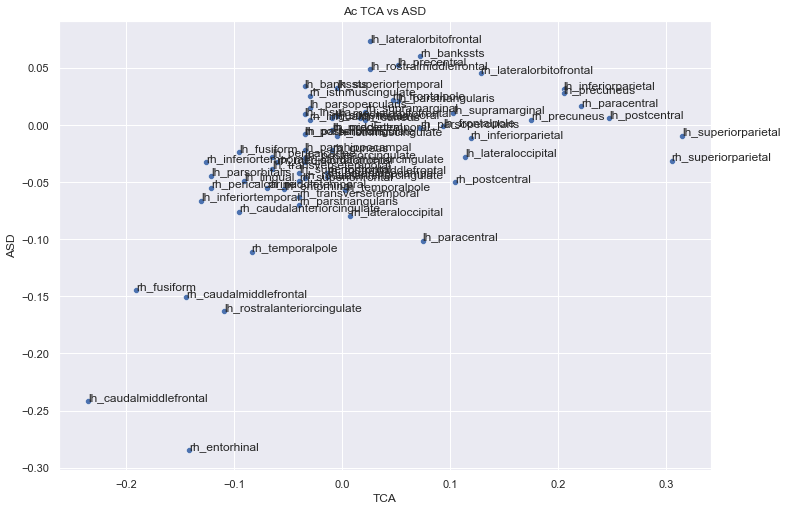

In [113]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="darkgrid")
sns.scatterplot(y = df_d2['ASD'], x = df_d2['TCA'], data = df_d2)
label_point(df_d2['TCA'], df_d2['ASD'], df_d2['ROI'].str.replace('_thickness_Z_predict', ''), plt.gca())
print(stats.pearsonr(df_d2['TCA'], df_d2['ASD']))
plt.title('Ac TCA vs ASD')

# xpoints = df_d['TCA']
# ypoints = df_d['ASD']
# labels = df_d['ROI'].str.replace('_thickness_Z_predict', '')
# for label, x, y in zip(labels, xpoints, ypoints):
#     plt.annotate(
#       label,
#       xy=(x, y), xytext=(-20, 20),
#       textcoords='offset points', ha='right', va='bottom',
#       bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#       arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
#    )
plt.show()

## Load coef LM

In [265]:
coef_tca = pd.read_csv(os.path.join(data_dir, 'coef_tca.csv'))

IsADirectoryError: [Errno 21] Is a directory: '/'

In [268]:
coef_tca['prev'] = np.array(prev_tca-prev_td)[0]

In [279]:
sns.set(rc={'figure.figsize':(12,12)})
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
 

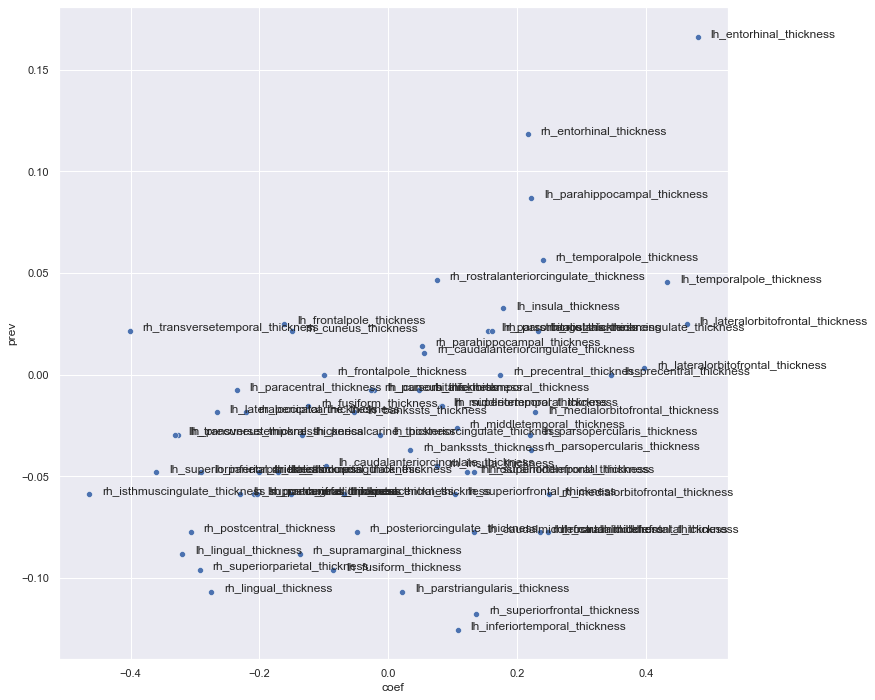

In [280]:
sns.scatterplot(data = coef_tca, y = 'prev', x = 'coef')
label_point(coef_tca['coef'], coef_tca['prev'], coef_tca['ROI'], plt.gca())

plt.show()

In [278]:
from scipy import stats
stats.spearmanr(coef_tca['coef'], coef_tca['prev'])

SpearmanrResult(correlation=0.3634336967385658, pvalue=0.002316868165749789)

lh_bankssts_thickness_Z_predict


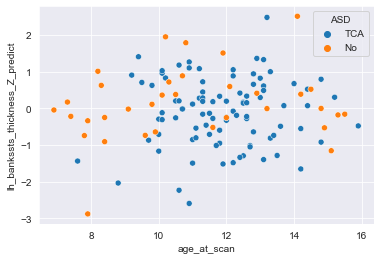

lh_caudalanteriorcingulate_thickness_Z_predict


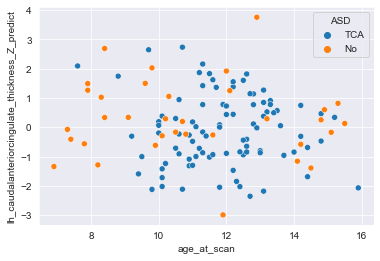

lh_caudalmiddlefrontal_thickness_Z_predict


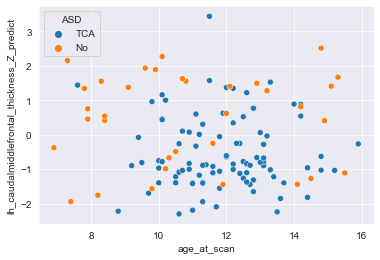

lh_cuneus_thickness_Z_predict


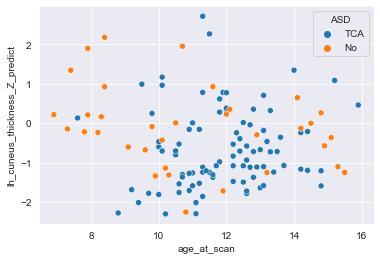

lh_entorhinal_thickness_Z_predict


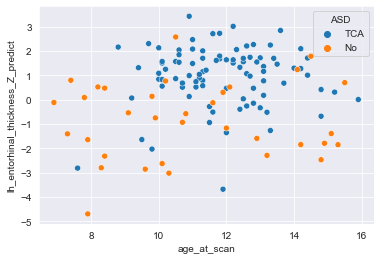

lh_fusiform_thickness_Z_predict


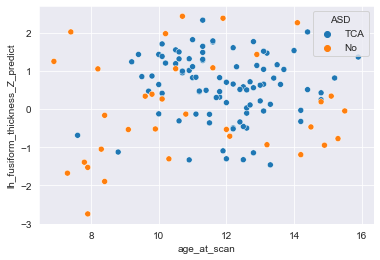

lh_inferiorparietal_thickness_Z_predict


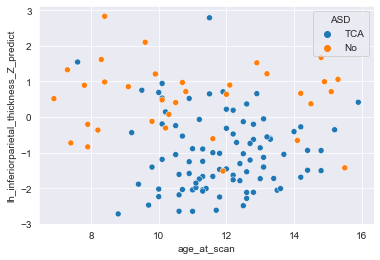

lh_inferiortemporal_thickness_Z_predict


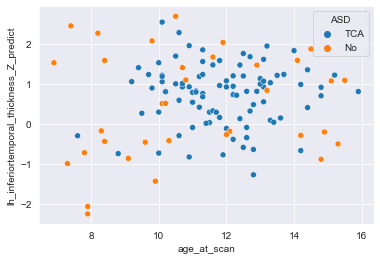

lh_isthmuscingulate_thickness_Z_predict


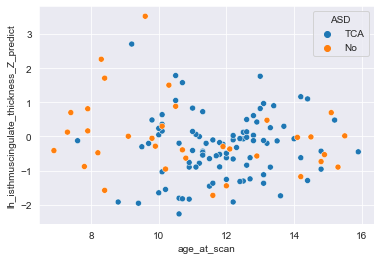

lh_lateraloccipital_thickness_Z_predict


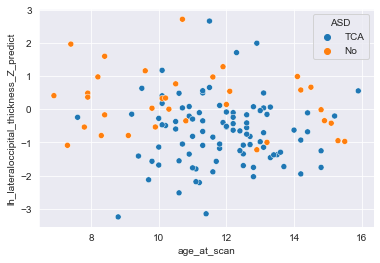

lh_lateralorbitofrontal_thickness_Z_predict


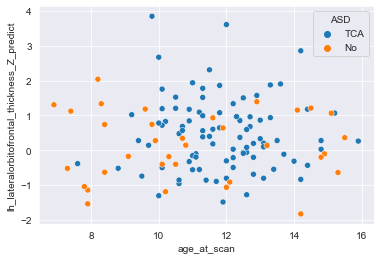

lh_lingual_thickness_Z_predict


lh_medialorbitofrontal_thickness_Z_predict


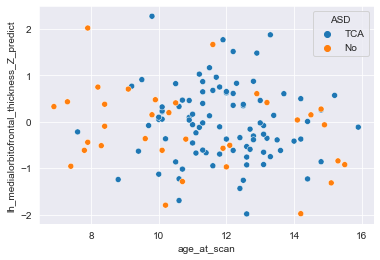

lh_middletemporal_thickness_Z_predict


lh_parahippocampal_thickness_Z_predict


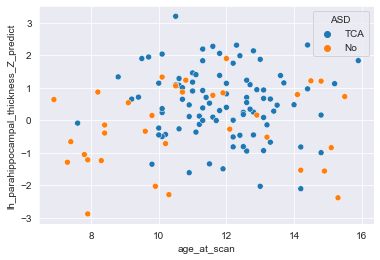

lh_paracentral_thickness_Z_predict


lh_parsopercularis_thickness_Z_predict


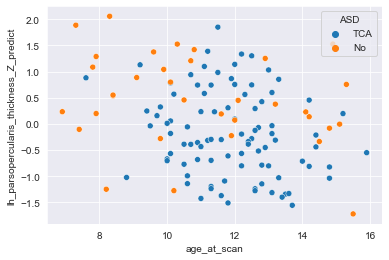

lh_parsorbitalis_thickness_Z_predict


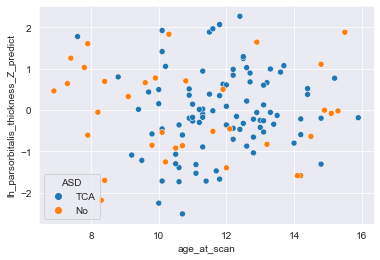

lh_parstriangularis_thickness_Z_predict


lh_pericalcarine_thickness_Z_predict


lh_postcentral_thickness_Z_predict


lh_posteriorcingulate_thickness_Z_predict


lh_precentral_thickness_Z_predict


lh_precuneus_thickness_Z_predict


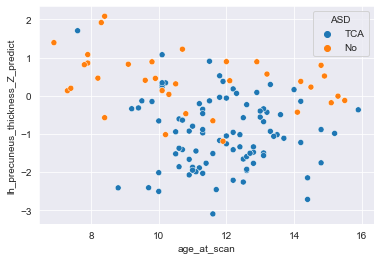

lh_rostralanteriorcingulate_thickness_Z_predict


lh_rostralmiddlefrontal_thickness_Z_predict


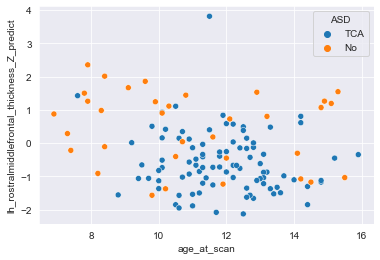

lh_superiorfrontal_thickness_Z_predict


lh_superiorparietal_thickness_Z_predict


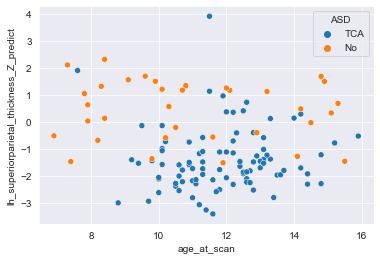

lh_superiortemporal_thickness_Z_predict


lh_supramarginal_thickness_Z_predict


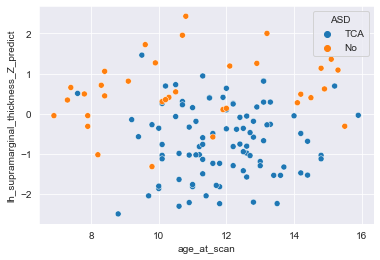

lh_frontalpole_thickness_Z_predict


lh_temporalpole_thickness_Z_predict


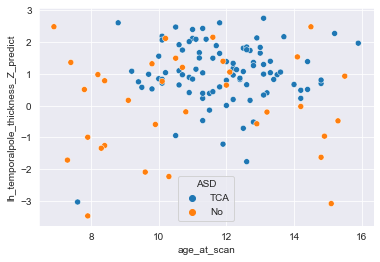

lh_transversetemporal_thickness_Z_predict


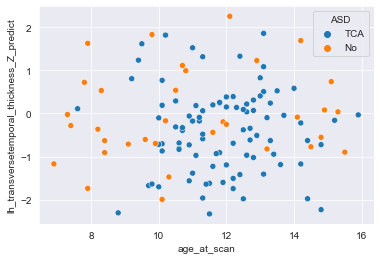

lh_insula_thickness_Z_predict


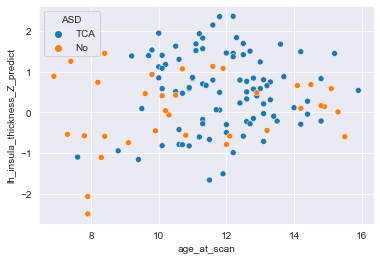

rh_bankssts_thickness_Z_predict


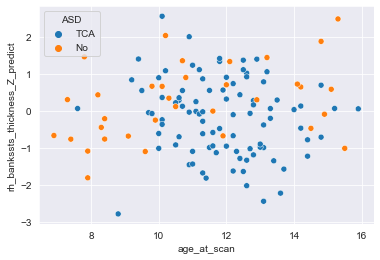

rh_caudalanteriorcingulate_thickness_Z_predict


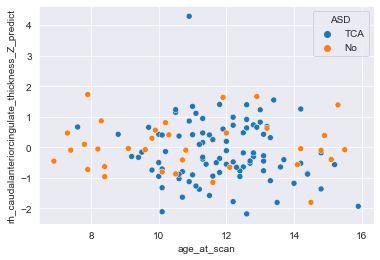

rh_caudalmiddlefrontal_thickness_Z_predict


rh_cuneus_thickness_Z_predict


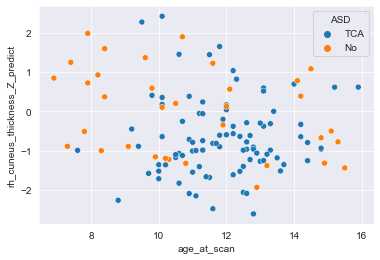

rh_entorhinal_thickness_Z_predict


rh_fusiform_thickness_Z_predict


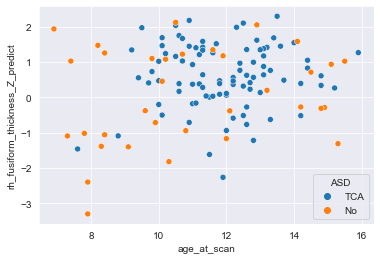

rh_inferiorparietal_thickness_Z_predict


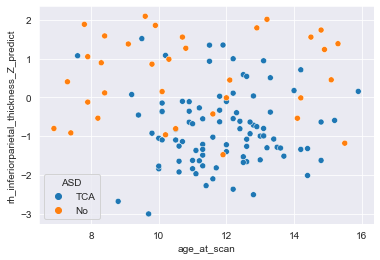

rh_inferiortemporal_thickness_Z_predict


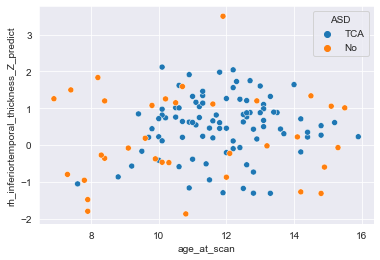

rh_isthmuscingulate_thickness_Z_predict


rh_lateraloccipital_thickness_Z_predict


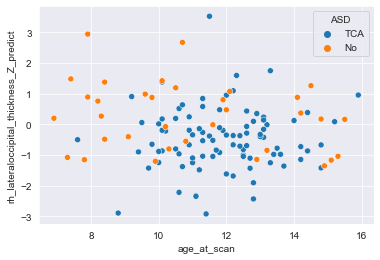

rh_lateralorbitofrontal_thickness_Z_predict


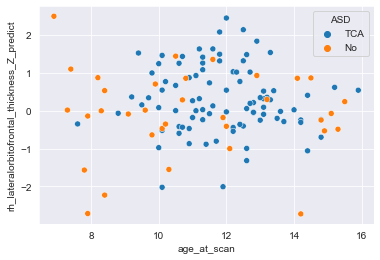

rh_lingual_thickness_Z_predict


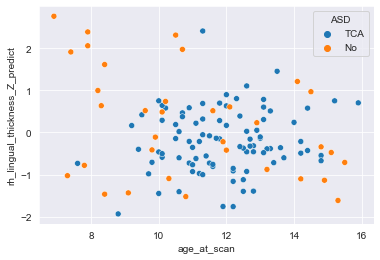

rh_medialorbitofrontal_thickness_Z_predict


rh_middletemporal_thickness_Z_predict


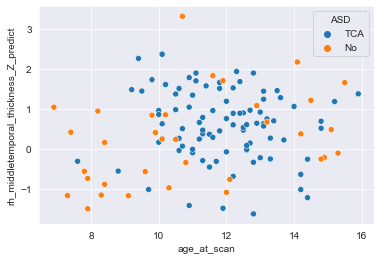

rh_parahippocampal_thickness_Z_predict


rh_paracentral_thickness_Z_predict


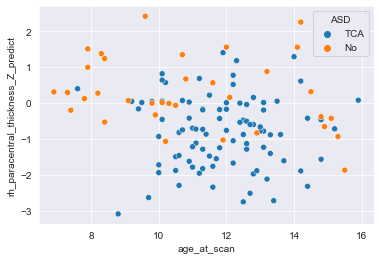

rh_parsopercularis_thickness_Z_predict


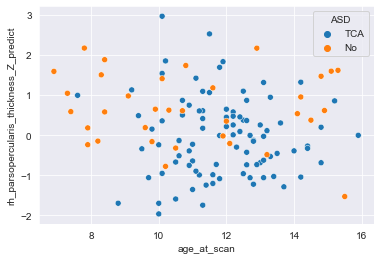

rh_parsorbitalis_thickness_Z_predict


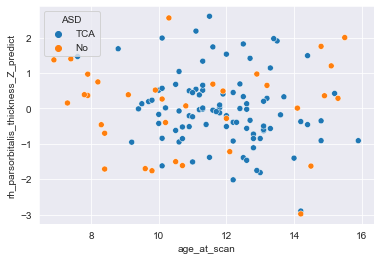

rh_parstriangularis_thickness_Z_predict


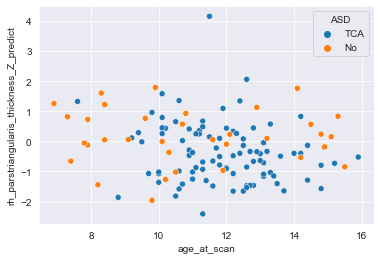

rh_pericalcarine_thickness_Z_predict


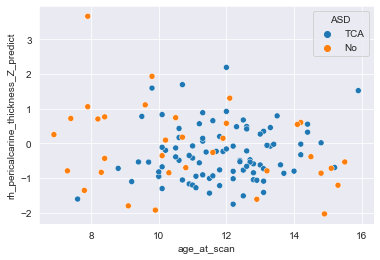

rh_postcentral_thickness_Z_predict


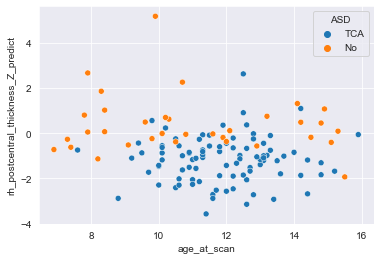

rh_posteriorcingulate_thickness_Z_predict


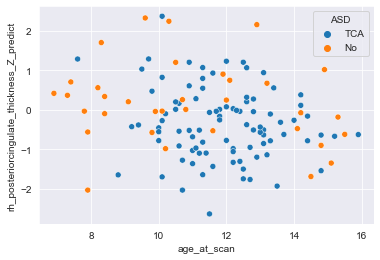

rh_precentral_thickness_Z_predict


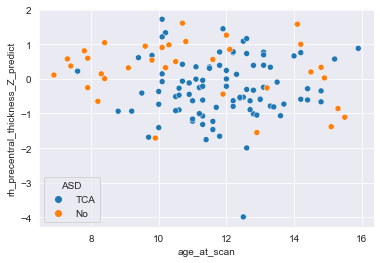

rh_precuneus_thickness_Z_predict


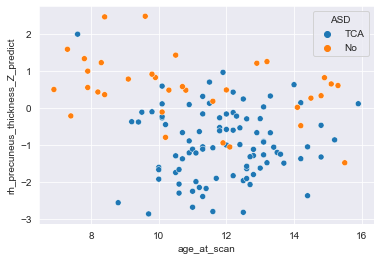

rh_rostralanteriorcingulate_thickness_Z_predict


rh_rostralmiddlefrontal_thickness_Z_predict


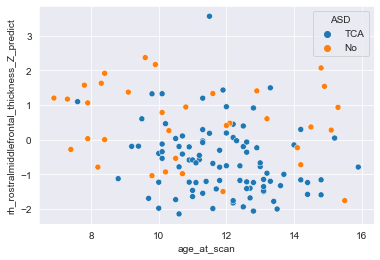

rh_superiorfrontal_thickness_Z_predict


rh_superiorparietal_thickness_Z_predict


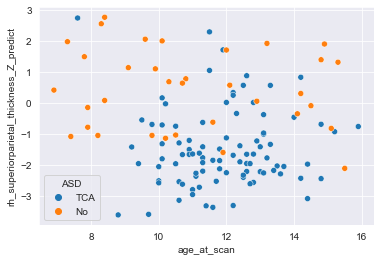

rh_superiortemporal_thickness_Z_predict


rh_supramarginal_thickness_Z_predict


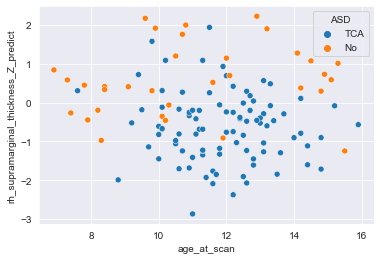

rh_frontalpole_thickness_Z_predict


rh_temporalpole_thickness_Z_predict


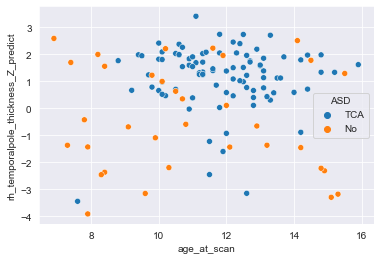

rh_transversetemporal_thickness_Z_predict


rh_insula_thickness_Z_predict


In [256]:
sns.set_style('darkgrid')
for i in thick:
    print(i)
    sns.scatterplot(data = Z_tcaprev_tca-prev_td, y = i, x = 'age_at_scan', hue = 'ASD')
    plt.show()

In [3]:
coef_tca = pd.read_csv(os.path.join(data_dir, 'coef_tca.csv'))

In [41]:
coef_asd = pd.read_csv(os.path.join(data_dir, 'coef_asd.csv'))

In [16]:
sns.set_theme(style = 'darkgrid')

In [22]:
coef_tca

Unnamed: 0                            ROI      pval      coef     adj_p  \
0           1                         meanCT  0.000105 -0.702613  0.000421   
1           2                        totalSA  0.641387  0.070840  1.000000   
2           3  EstimatedTotalIntraCranialVol  0.891481  0.019092  1.000000   
3           4                            CSF  0.000182  0.656197  0.000730   

           sign  
0  adj-p < 0.05  
1    Non-signif  
2    Non-signif  
3  adj-p < 0.05

In [39]:
sns.set_palette('Set1')
sns.barplot(x = 'coef', y = 'ROI', data = coef_tca, hue = 'sign')
plt.xlim(-1, 1)
plt.show()

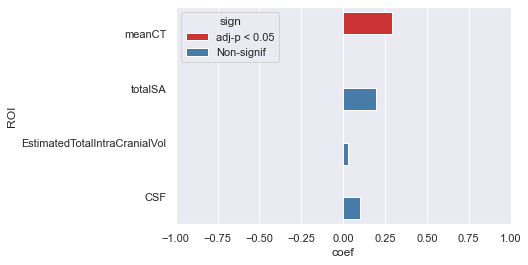

In [42]:
sns.barplot(x = 'coef', y = 'ROI', data = coef_asd, hue = 'sign')
plt.xlim(-1, 1)
plt.show()

In [6]:
coef_asd

Unnamed: 0                            ROI      pval      coef     adj_p  \
0           1                         meanCT  0.008056  0.292391  0.032224   
1           2                        totalSA  0.089300  0.195507  0.357200   
2           3  EstimatedTotalIntraCranialVol  0.799468  0.030877  1.000000   
3           4                            CSF  0.353151  0.098723  1.000000   

           sign  
0  adj-p < 0.05  
1    Non-signif  
2    Non-signif  
3    Non-signif